# Sufficiently Non Linear Additive Decoder

In [ ]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

def f1(z1):
  return np.array([z1, z1**2, z1**3, z1**4])

def f2(z2):
  return np.array([z2+1, (z2+1)**2, (z2+1)**3, (z2+1)**4])

def f(z1, z2):
  return f1(z1) + f2(z2)

def Jac(z1,z2):
  return np.array([[1      , 1          ],
                   [2*z1   , 2*(z2+1)   ],
                   [3*z1**2, 3*(z2+1)**2],
                   [4*z2**3, 4*(z2+1)**3]])

def norm_columns(mat):
  col_norms = np.linalg.norm(mat, axis=0)
  return mat / col_norms

def compute_detJacTJac(z1, z2):
  jac = Jac(z1,z2)
  jac = norm_columns(jac)  # normalizing to have unit length columns
  jacTjac = jac.T@jac
  return numpy.linalg.det(jacTjac)

def W(z1, z2):
  return np.array([[1      , 0       , 1          , 0           ],
                   [2*z1   , 2       , 2*(z2+1)   , 2           ],
                   [3*z1**2, 6*z1    , 3*(z2+1)**2, 6*(z2+1)    ],
                   [4*z2**3, 12*z1**2, 4*(z2+1)**3, 12*(z2+1)**2]])

def compute_detW(z1,z2):
  W_ = norm_columns(W(z1,z2))  # normalizing to have unit length columns
  return numpy.linalg.det(W_)

delta = 0.0025
range1 = np.arange(-1.25, 0.25, delta)
range2 = np.arange(-0.25, 1.25, delta)
Z1, Z2 = np.meshgrid(range1, range2)
f_values = np.zeros((len(range2),len(range1), 4))
detW = np.zeros((len(range2),len(range1)))
detJacTJac = np.zeros((len(range2),len(range1)))
print(Z1.shape, Z2.shape, len(range1), len(range2))
print(detW.shape)
for i in range(len(range2)):
  for j in range(len(range1)):
    f_values[i,j,:] = f(Z1[i,j], Z2[i,j])
    detW[i,j] = compute_detW(Z1[i,j], Z2[i,j])
    detJacTJac[i,j] = compute_detJacTJac(Z1[i,j], Z2[i,j])


(600, 600) (600, 600) 600 600
(600, 600)


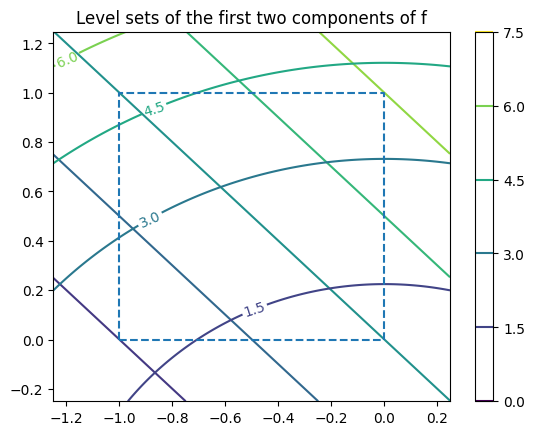

In [ ]:
# Visual proof that f: [-1,0]x[0,1] -> R^4 is injective

fig, ax = plt.subplots()
CS = ax.contour(Z1, Z2, f_values[:, :, 0], levels=5)
CS = ax.contour(Z1, Z2, f_values[:, :, 1], levels=5)
#CS = ax.contour(Z1, Z2, f_values[:, :, 2], levels=5)
#CS = ax.contour(Z1, Z2, f_values[:, :, 3], levels=5)
ax.clabel(CS)
ax.plot([-1, 0, 0, -1,-1], [0,0, 1, 1, 0], linestyle='dashed')
ax.set_title('Level sets of the first two components of f')
fig.colorbar(CS)

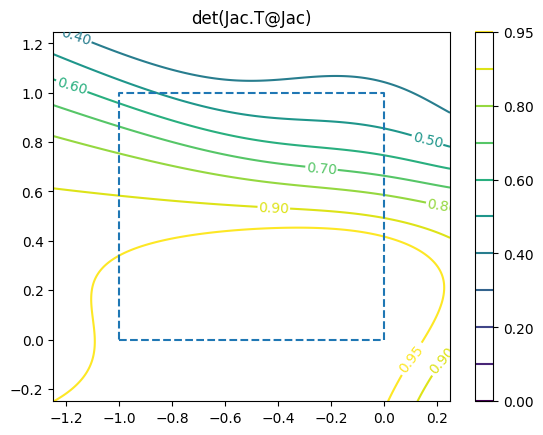

In [ ]:
# Visual proof that Jacobian of f is full rank (and thus is a diffeomorphism)
# ***Actually, to show it is a diffeomorphism, we would need to show that f^{-1} is continuous i.e. f maps open sets of its domain to open sets of its image.

fig, ax = plt.subplots()
CS = ax.contour(Z1, Z2, np.sqrt(np.abs(detJacTJac)), levels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])  #, -25, -10, -5, 0, 0.001, 5, 10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 7500, 10000])
ax.clabel(CS)
ax.plot([-1, 0, 0, -1,-1], [0,0, 1, 1, 0], linestyle='dashed')
ax.set_title('det(Jac.T@Jac)')
fig.colorbar(CS)

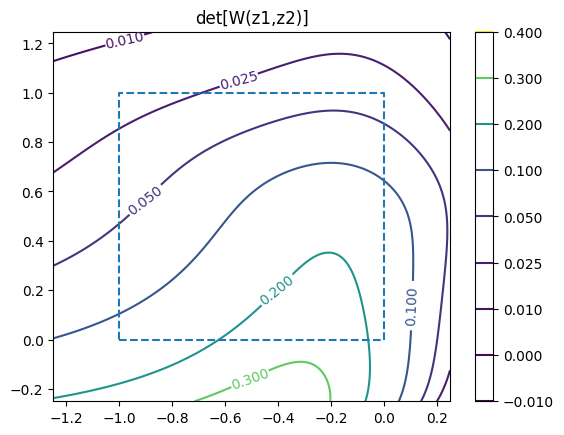

In [ ]:
# Visual proof that it satisfies the sufficient nonlinearity assumption

fig, ax = plt.subplots()
CS = ax.contour(Z1, Z2, detW, levels=[-0.01, 0.0, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4]) #levels=[-100, -50, -25, -10, -5, 0, 5, 10, 25, 50, 100, 250, 500, 1000, 2000, 3000])
ax.clabel(CS)
ax.plot([-1, 0, 0, -1,-1], [0,0, 1, 1, 0], linestyle='dashed')
ax.set_title('det[W(z1,z2)]')
fig.colorbar(CS)